In [2]:
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

In [34]:
# シイタケ画像に円を当てはめて一致率を判定
folder_lists = [
    "/home/data/0930/mask"
]

# 真円フィッティングを行うかどうかのフラグ
fit_circle = True # Trueなら真円、Falseなら楕円
jusin = False

for folder_path in folder_lists:
    folder_name = folder_path.split("/")[-1]
    output_file = f'/home/src/round_attach_result/{folder_name}_result.txt'
    img_files = glob.glob(os.path.join(folder_path, '*.jpg'))
    results = [f"Folder: {folder_name}\n"]
    
    for img_file in img_files:
        # print(f"Processing {img_file}")
        mask_img  = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
        _, mask_img = cv2.threshold(mask_img, 128, 255, cv2.THRESH_BINARY)
        counters, _ = cv2.findContours(mask_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        if counters:
            max_counter = max(counters, key=cv2.contourArea)
        
        if fit_circle and not jusin:#真円
            (x,y), radius = cv2.minEnclosingCircle(max_counter)
            center = (int(x), int(y))
            radius = int(radius)
            shape_mask = np.zeros_like(mask_img)
            cv2.circle(shape_mask, center, radius, 255, -1)
        
        if fit_circle and jusin:#真円＋重心
                (x, y), radius = cv2.minEnclosingCircle(max_counter)
                # 重心を計算する            
                M = cv2.moments(max_counter)
                if M["m00"] != 0:
                    cX = int(M["m10"] / M["m00"])
                    cY = int(M["m01"] / M["m00"])
                else:
                    cX, cY = 0, 0
                center = (cX, cY)
                radius = int(radius)
                shape_mask = np.zeros_like(mask_img)
                cv2.circle(shape_mask, center, radius, 255, -1)
        
        if not fit_circle:#楕円
                ellipse = cv2.fitEllipse(max_counter)
                center = (int(ellipse[0][0]), int(ellipse[0][1]))
                axes = (int(ellipse[1][0] / 2), int(ellipse[1][1] / 2))  # 半径は長径と短径の半分
                shape_mask = np.zeros_like(mask_img)
                cv2.ellipse(shape_mask, ellipse, 255, -1)
        
        intersection = cv2.bitwise_and(mask_img, shape_mask)
        union = cv2.bitwise_or(mask_img, shape_mask)
        intersection_area = np.sum(intersection == 255)
        union_area = np.sum(union == 255)
        iou = intersection_area / union_area
        
        if fit_circle:
            results.append(f"File: {os.path.basename(img_file)}, Center: {center}, Radius: {radius}, IoU: {iou:.2f}\n")
        else:
            results.append(f"File: {os.path.basename(img_file)}, Center: {center}, Axes: {axes}, IoU: {iou:.2f}\n")        
    with open(output_file, 'w') as f:
        f.writelines(results)
    

In [ ]:
#シイタケ画像に円を当てはめて一致率を判定
# # 処理するフォルダのリスト
# folder_list = [
#             #    '/home/data/yolo_mask_crop/A', 
#             #    '/home/data/yolo_mask_crop/B', 
#             #    '/home/data/yolo_mask_crop/CD',
#             '/home/data/0930/mask'
#                ]

# # 真円フィッティングを行うかどうかのフラグ
# fit_circle = True # Trueなら真円、Falseなら楕円
# jusin = False

# # 各フォルダに対して処理を実行
# for folder_path in folder_list:
#     # フォルダ名を取得
#     folder_name = os.path.basename(folder_path.rstrip('/'))
#     output_file = f'/home/src/round_attach_result/{folder_name}_result.txt'
#     # 結果を保存するためのリスト
#     results = [f"Folder: {folder_name}\n"]

#     # フォルダ内のすべての画像ファイルを取得
#     image_files = glob.glob(os.path.join(folder_path, '*.jpg'))
#     # image_files = glob.glob(os.path.join(folder_path, '*.jpg'))


#     for image_file in image_files:
#         # マスク画像を読み込む
#         mask_image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
#         _, mask_image = cv2.threshold(mask_image, 128, 255, cv2.THRESH_BINARY)

#         # 輪郭を検出する
#         contours, _ = cv2.findContours(mask_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#         if contours:
#             # 最大の輪郭を選択する
#             largest_contour = max(contours, key=cv2.contourArea)

#             if fit_circle == True and jusin != True:
#                 # 真円をフィッティングする
#                 (x, y), radius = cv2.minEnclosingCircle(largest_contour)
#                 center = (int(x), int(y))
#                 radius = int(radius)

#                 # 真円をバイナリマスクとして描画する
#                 shape_mask = np.zeros_like(mask_image)
#                 cv2.circle(shape_mask, center, radius, 255, -1)
            
#             if fit_circle == True and jusin == True:
#                 (x, y), radius = cv2.minEnclosingCircle(largest_contour)
#                 # 重心を計算する            
#                 M = cv2.moments(largest_contour)
#                 if M["m00"] != 0:
#                     cX = int(M["m10"] / M["m00"])
#                     cY = int(M["m01"] / M["m00"])
#                 else:
#                     cX, cY = 0, 0

#                 center = (cX, cY)
#                 radius = int(radius)

#                 # 真円をバイナリマスクとして描画する
#                 shape_mask = np.zeros_like(mask_image)
#                 cv2.circle(shape_mask, center, radius, 255, -1)
#             else:
#                 # 楕円をフィッティングする
#                 ellipse = cv2.fitEllipse(largest_contour)
#                 center = (int(ellipse[0][0]), int(ellipse[0][1]))
#                 axes = (int(ellipse[1][0] / 2), int(ellipse[1][1] / 2))  # 半径は長径と短径の半分

#                 # 楕円をバイナリマスクとして描画する
#                 shape_mask = np.zeros_like(mask_image)
#                 cv2.ellipse(shape_mask, ellipse, 255, -1)

#             # 一致率を計算する
#             intersection = cv2.bitwise_and(mask_image, shape_mask)
#             union = cv2.bitwise_or(mask_image, shape_mask)
#             intersection_area = np.sum(intersection == 255)
#             union_area = np.sum(union == 255)
#             iou = intersection_area / union_area
            
#             # print(image_file)

#             # 結果をリストに追加
#             if fit_circle:
#                 results.append(f"File: {os.path.basename(image_file)}, Center: {center}, Radius: {radius}, IoU: {iou:.2f}\n")
#             else:
#                 results.append(f"File: {os.path.basename(image_file)}, Center: {center}, Axes: {axes}, IoU: {iou:.2f}\n")

#     # 結果をテキストファイルに保存
#     # print(results)
#     with open(output_file, 'w') as f:
#         f.writelines(results)

#     print(f"結果が {output_file} に保存されました。")

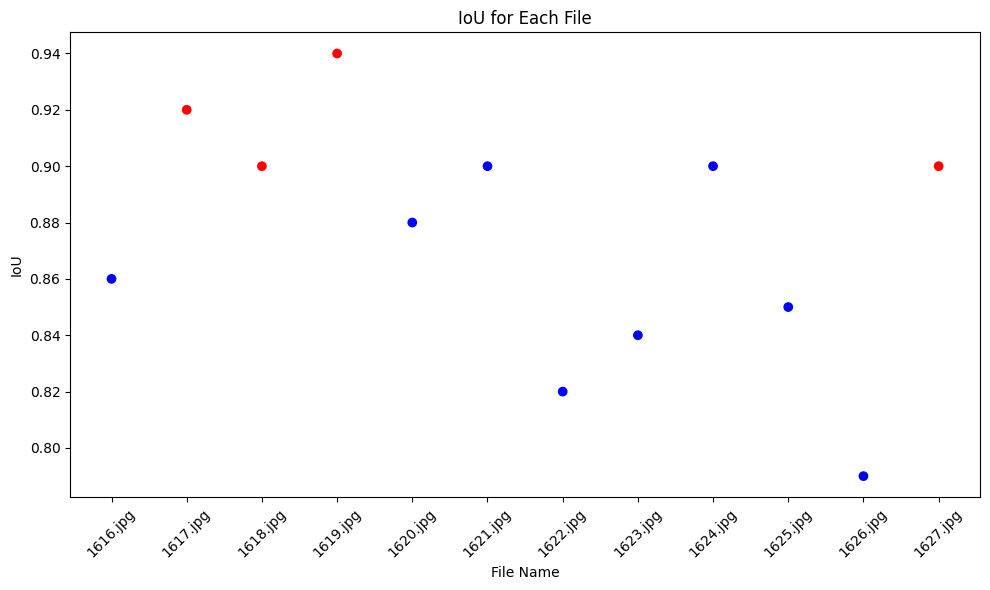

In [2]:
#txtファイルからIoUの値を取得しグラフに表示
import matplotlib.pyplot as plt
import os

# 処理する結果ファイルのリストと対応する色
result_files = [
    # ('/home/src/round_attach_result/A_result.txt', 'red'),
    # ('/home/src/round_attach_result/B_result.txt', 'green'),
    # ('/home/src/round_attach_result/CD_result.txt', 'blue')
    ('/home/src/round_attach_result/mask_result.txt', 'blue')
]

# ファイル名とIoUを保存するリスト
file_names = []
ious = []
colors = []

# 特定のファイル名を指定して色を変える
special_files = [
    '1617.jpg',
    '1618.jpg',
    '1619.jpg',
    '1627.jpg',
    
]  
special_color = 'red'

# 各結果ファイルを読み込んでデータを抽出
for result_file, default_color in result_files:
    with open(result_file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if line.startswith("File:"):
                parts = line.split(',')
                file_name = parts[0].split(': ')[1].strip().replace('IMG_', '')  # 'IMG_'を消去
                iou = float(parts[-1].split(': ')[1].strip())
                file_names.append(file_name)
                ious.append(iou)
                # 特定のファイル名の場合は特別な色を設定
                if file_name in special_files:
                    colors.append(special_color)
                else:
                    colors.append(default_color)

# ファイル名、IoU、色のリストをまとめてソート
sorted_data = sorted(zip(file_names, ious, colors), key=lambda x: x[0])

# ソートされたデータを再度リストに分解
file_names, ious, colors = zip(*sorted_data)

# グラフを作成
plt.figure(figsize=(10, 6))
plt.scatter(file_names, ious, c=colors)
plt.xlabel('File Name')
plt.ylabel('IoU')
plt.title('IoU for Each File')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

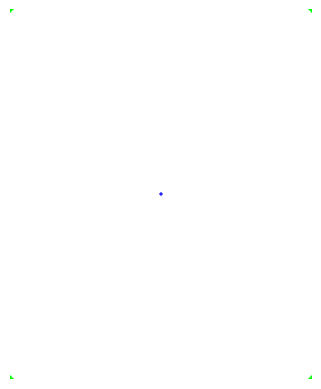

In [4]:
#真円，楕円フィッティングの結果を表示
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 真円フィッティングを行うかどうかのフラグ

# マスク画像を読み込む
mask_image = cv2.imread('/home/data/1008/mask/IMG_1628.jpg', cv2.IMREAD_GRAYSCALE)
_,mask_image = cv2.threshold(mask_image, 128, 255, cv2.THRESH_BINARY)

# 輪郭を検出する
contours, _ = cv2.findContours(mask_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    # 最大の輪郭を選択する
    largest_contour = max(contours, key=cv2.contourArea)


    # 真円をフィッティングする
    (x, y), radius = cv2.minEnclosingCircle(largest_contour)
    center = (int(x), int(y))
    radius = int(radius)
    shape_mask = np.zeros_like(mask_image)
    cv2.circle(shape_mask, center, radius, 255, -1)

    # 一致率を計算する
    intersection = cv2.bitwise_and(mask_image, shape_mask)
    union = cv2.bitwise_or(mask_image, shape_mask)
    intersection_area = np.sum(intersection == 255)
    union_area = np.sum(union == 255)
    iou = intersection_area / union_area
    

    # 結果を表示する
    output_image = cv2.cvtColor(mask_image, cv2.COLOR_GRAY2BGR)

    cv2.circle(output_image, center, radius, (0, 255, 0), 2)
    cv2.circle(output_image, center, 1, (0, 0, 255), -1)
    # plt.title(f'Center: {center}, Radius: {radius}, IoU: {iou:.2f}')

    plt.imshow(output_image)
    plt.axis('off')
    plt.show()

    # print(f"真円の中心: {center}")
    # print(f"真円の半径: {radius}")
    # print(f"一致率 (IoU): {iou:.2f}")

In [ ]:
#襞領域との可視化
import pandas as pd
import matplotlib.pyplot as plt
import os

# 処理する結果ファイルのリストと対応する色
result_files = [
    # ('/home/src/round_attach_result/A_result.txt', 'red'),
    # ('/home/src/round_attach_result/B_result.txt', 'green'),
    # ('/home/src/round_attach_result/CD_result.txt', 'blue')
    ('/home/src/round_attach_result/mask_result.txt', 'blue')
]

# ファイル名とIoUを保存するリスト
file_names = []
ious = []
colors = []

# 特定のファイル名を指定して色を変える
special_files = [
    '1598.jpg',
    '1599.jpg',
    '1604.jpg',
    '1605.jpg',
]  
special_color = 'red'

# 各結果ファイルを読み込んでデータを抽出
for result_file, default_color in result_files:
    with open(result_file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if line.startswith("File:"):
                parts = line.split(',')
                file_name = parts[0].split(': ')[1].strip().replace('IMG_', '')  # 'IMG_'を消去
                iou = float(parts[-1].split(': ')[1].strip())
                file_names.append(file_name)
                ious.append(iou)
                # 特定のファイル名の場合は特別な色を設定
                if file_name in special_files:
                    colors.append(special_color)
                else:
                    colors.append(default_color)

# ファイル名、IoU、色のリストをまとめてソート
sorted_data = sorted(zip(file_names, ious, colors), key=lambda x: x[0])

# ソートされたデータを再度リストに分解
file_names, ious, colors = zip(*sorted_data)

# shiitake_ratio.txtを読み込む
df = pd.read_csv('/home/data/0917/shiitake_ratio.txt', sep=',')

# ファイル名とnumberを対応付ける辞書を作成
file_to_number = dict(zip(df['tag'], df['number']))

# ファイル名に対応するnumberを取得
numbers = [file_to_number.get(f'IMG_{file_name}', None) for file_name in file_names]

# 有効なデータのみを抽出
valid_data = [(iou, number, color) for iou, number, color in zip(ious, numbers, colors) if number is not None]

# 有効なデータを再度リストに分解
ious, numbers, colors = zip(*valid_data)

# グラフを作成
plt.figure(figsize=(10, 6))
plt.scatter(ious, numbers, c=colors)
plt.xlabel('IoU')
plt.ylabel('number')
plt.title('IoU vs Number')
plt.tight_layout()
plt.show()

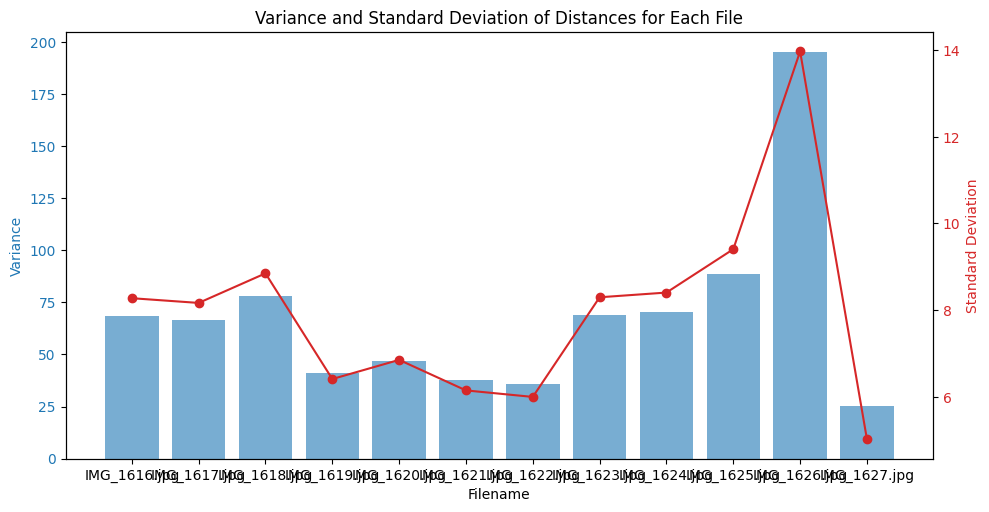

In [2]:
#中心から輪郭までの距離でそれぞれが離れすぎていたら真円ではないと判定
import cv2
import matplotlib.pyplot as plt
import os
import re
import math
import numpy as np

def read_mask_result(file_path):
    results = {}
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("File:"):
                parts = line.split(',')
                if len(parts) < 3:
                    print(f"Skipping incomplete line: {line.strip()}")
                    continue  # 不完全な行をスキップ
                try:
                    file_name = parts[0].split(': ')[1].strip()
                    center_match = re.search(r'Center: \((\d+), (\d+)\)', line)
                    if center_match:
                        center = (int(center_match.group(1)), int(center_match.group(2)))
                        results[file_name] = center
                    else:
                        print(f"Center not found in line: {line.strip()}")
                except Exception as e:
                    print(f"Error processing line: {line.strip()}")
                    print(f"Exception: {e}")
    return results

def find_bounds_8_directions(image, center):
    directions = {
        "上": (-1, 0), "下": (1, 0),  # 上下
        "左": (0, -1), "右": (0, 1),  # 左右
        "左上": (-1, -1), "右上": (-1, 1),  # 左上、右上
        "左下": (1, -1), "右下": (1, 1)  # 左下、右下
    }
    
    bounds = {}
    for direction_name, (dy, dx) in directions.items():
        y, x = center
        while 0 <= y < image.shape[0] and 0 <= x < image.shape[1] and image[y, x] != 0:
            y += dy
            x += dx
        bounds[direction_name] = (y, x)
    
    return bounds

def calculate_distance(center, point):
    return math.sqrt((center[0] - point[0]) ** 2 + (center[1] - point[1]) ** 2)

def calculate_variance(distances):
    mean_distance = np.mean(distances)
    variance = np.mean((distances - mean_distance) ** 2)
    return variance

def main():
    result_file = '/home/src/round_attach_result/mask_result.txt'
    image_folder = '/home/data/0930/mask'
    output_file = '/home/src/round_attach_result/val&std.txt'
    centers = read_mask_result(result_file)
    
    filenames = []
    variances = []
    std_devs = []
    
    with open(output_file, 'w') as f:
        for file_name, center in centers.items():
            image_path = os.path.join(image_folder, file_name)
            
            if image_path is None:
                raise FileNotFoundError(f"Image not found: {image_path}")

            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # 2値化
            _, image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

            # 8方向で探索
            bounds = find_bounds_8_directions(image, center)
            # print(f"File: {file_name}")
            f.write(f"File: {file_name}\n")
            distances = []
            for direction_name, (y, x) in bounds.items():
                distance = calculate_distance(center, (x, y))
                distances.append(distance)
                # print(f"Direction {direction_name}: (y, x) = ({y}, {x}), Distance = {distance:.2f}")
                f.write(f"Direction {direction_name}: (y, x) = ({y}, {x}), Distance = {distance:.2f}\n")
            
            # 分散の計算
            distances = np.array(distances)
            variance = calculate_variance(distances)
            std_dev = np.sqrt(variance)
            # print(f"Variance of distances: {variance:.2f}")
            # print(f"Standard deviation of distances: {std_dev:.2f}")
            f.write(f"Variance of distances: {variance:.2f}\n")
            f.write(f"Standard deviation of distances: {std_dev:.2f}\n\n")
            
            # ファイル名と分散、標準偏差をリストに追加
            filenames.append(file_name)
            variances.append(variance)
            std_devs.append(std_dev)
       
    # ファイル名順に並べ替え
    sorted_indices = sorted(range(len(filenames)), key=lambda i: int(filenames[i].split('_')[1].split('.')[0]))
    filenames = [filenames[i] for i in sorted_indices]
    variances = [variances[i] for i in sorted_indices]
    std_devs = [std_devs[i] for i in sorted_indices]
    
    # ファイルごとの分散と標準偏差をグラフ化
    fig, ax1 = plt.subplots(figsize=(10, 5))

    color = 'tab:blue'
    ax1.set_xlabel('Filename')
    ax1.set_ylabel('Variance', color=color)
    ax1.bar(filenames, variances, color=color, alpha=0.6, label='Variance')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:red'
    ax2.set_ylabel('Standard Deviation', color=color)  # we already handled the x-label with ax1
    ax2.plot(filenames, std_devs, color=color, marker='o', linestyle='-', label='Standard Deviation')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title('Variance and Standard Deviation of Distances for Each File')
    plt.xticks(rotation=45)
    plt.show()
        
        

if __name__ == "__main__":
    main()

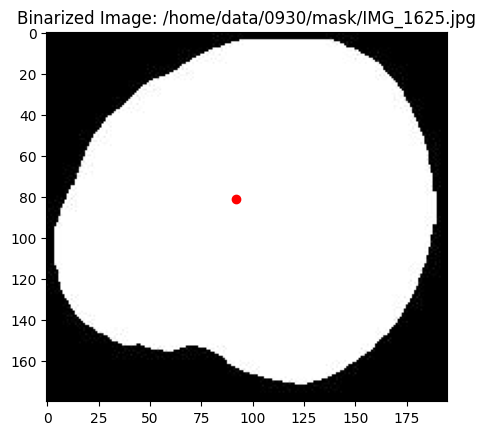

Center Y: 81, X values: [1, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 191]
Image row at y=81: [  0   3   0   0   0   3   0  17   3   0 255 255 227 255 252 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255

In [3]:
#test

import cv2
import matplotlib.pyplot as plt

def get_x_values_at_center_y(image, center):
    # 中心座標のy値を取得
    y = center[1]

    # 中心座標と同じy座標のx軸の値を取得
    x_values = [x for x in range(image.shape[1]) if image[y, x] != 0]

    return x_values

def main(image_path, center):
    # 画像をグレースケールで読み込む
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image not found: {image_path}")

    # 2値化
    # ret, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    binary_image = image
    # print(f"Used threshold: {ret}")

    # 2値化された画像を表示
    plt.imshow(binary_image, cmap='gray')
    plt.title(f"Binarized Image: {image_path}")
    plt.scatter([center[0]], [center[1]], color='red')  # 中心座標を赤い点で表示
    plt.show()

    # 中心座標と同じy軸上で0でないx座標の値を取得
    x_values = get_x_values_at_center_y(binary_image, center)
    print(f"Center Y: {center[1]}, X values: {x_values}")

    # 中心座標と同じy座標の行を出力
    y = center[1]
    print(f"Image row at y={y}: {binary_image[y]}")

if __name__ == "__main__":
    # 例として画像パスと中心座標、閾値を指定
    image_path = '/home/data/0930/mask/IMG_1625.jpg'
    center = (92, 81)

    main(image_path, center)